In [1]:
import pandas as pd
import numpy as np
import warnings   
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv("Diabetes data.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180,32.9,0.171,63.0,0
764,2,122.0,70.0,27,0,36.8,0.340,27.0,0
765,5,121.0,72.0,23,112,26.2,0.245,30.0,0
766,1,126.0,60.0,0,0,30.1,0.349,47.0,1


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168,43.1,2.288,33.0,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,766.000000,767.000000,768.000000,768.000000,768.000000,767.000000,767.000000,768.000000
mean,3.845052,120.913838,69.091265,20.536458,79.799479,31.992578,0.471860,33.251630,0.348958
std,3.369578,32.007644,19.364432,15.952218,115.244002,7.884160,0.331545,11.764133,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,127.250000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     2
BloodPressure               1
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    1
Age                         1
Outcome                     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   766 non-null    float64
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [7]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [8]:
# Remove rows with missing values
data.dropna(inplace=True)
# Or impute missing values with the mean
data.fillna(data.mean(), inplace=True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180,32.9,0.171,63.0,0
764,2,122.0,70.0,27,0,36.8,0.340,27.0,0
765,5,121.0,72.0,23,112,26.2,0.245,30.0,0
766,1,126.0,60.0,0,0,30.1,0.349,47.0,1


In [9]:
# Split the data into features (X) and target (y)
X = data.drop(['Pregnancies','Outcome','Insulin','SkinThickness'],axis =1)
y = data['Age']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=45)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9803921568627451
Confusion Matrix:
 [[11  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0  5 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  1  0]]
Classification Report:
               precision    recall  f1-score   support

        21.0       1.00      1.00      1.00        11
        22.0       1.00      1.00      1.00        11
        23.0       1.00      1.00      1.00         5
        24.0       1.00      1.00      1.00        10
        25.0       1.00      1.00      1.00         9
        26.0       1.00      1.00      1.00        10
        27.0       1.00      1.00      1.00         9
        28.0       1.00      1.00      1.00         9
        29.0       1.00      1.00      1.00         6
        30.0       1.00      1.00      1.00         6
        31.0       1.00      1.00      1.00         5
        32.0       1.00      1.00      1.00         2
        33.0       1.00      1.00      1.00         5
        34.0   

In [10]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)

# Optionally, you can also check for any columns with zero values, which might indicate missing data.
zero_values = (data == 0).sum()

# Print the count of zero values for each column
print("\nZero Values (Potential Missing Data):")
print(zero_values)


Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Zero Values (Potential Missing Data):
Pregnancies                 110
Glucose                       5
BloodPressure                33
SkinThickness               223
Insulin                     369
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     496
dtype: int64


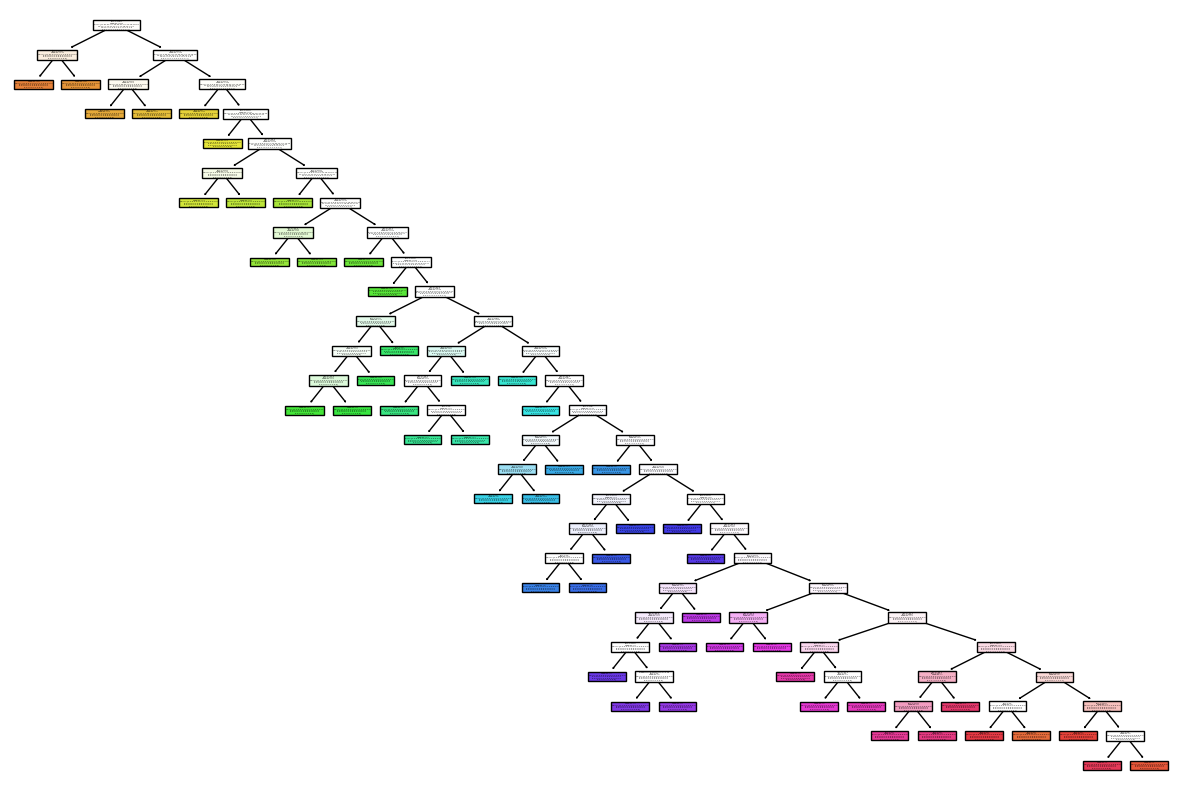

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()
